Afeka Computer Science - Final project code

By Liav, May, and Yuval

In [1]:
import os
import cv2
import re
import difflib
import numpy as np
import tensorflow as tf
import seaborn as sns
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Part 1 - Food Classification From Photo
This is the main part. Here we use the Food-11 image dataset to build an image recognition model.

# Defining constant variables
Here, we are defining different variables that we will use for our algorithm.

The reason for this is so that we will be able to tune those numbers later on if needed. 

For example, at first we tried to run the algorithm with 30 epochs, but it took too much time and didn't prove any usefulness, so we lowered it to 20 epoches and recieved similiar results in much lower time.

In [2]:
# Load the data
data_path = "/kaggle/input/food11-image-dataset/"
categories = sorted(os.listdir(os.path.join(data_path, "training")))
epochs_number = 20

def load_data(data_type):
    images = []
    labels = []
    for idx, category in enumerate(categories):
        category_path = os.path.join(data_path, data_type, category)
        for img_name in os.listdir(category_path):
            img = cv2.imread(os.path.join(category_path, img_name))
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(idx)
    return np.array(images), np.array(labels)

X_train, y_train = load_data("training")
X_val, y_val = load_data("validation")

# Defining the model
We need to define the model architecture using the Keras Sequential API. The model is a convolutional neural network (CNN) that has three convolutional layers with increasing number of filters, followed by three max-pooling layers to downsample the feature maps. Then, the flattened output is passed through two fully connected (dense) layers with ReLU activation functions. Finally, the output layer has a number of nodes equal to the number of classes in the dataset and a softmax activation function to generate the class probabilities.

The input shape for the first convolutional layer is set to the image size (img_size) and 3 for RGB color channels. The number of filters (32, 64, and 128) and kernel size (3x3) in each convolutional layer are based on empirical observations that they work well for image classification tasks. The size of the first dense layer (128) is also an empirical choice, and can be modified based on the size of the dataset and complexity of the problem.

## Compiling The Model
`model.compile` is used to compile the model with the optimizer, loss function, and evaluation metric.

`optimizer`: determines how the model is updated based on the data and the loss function. Here, we are using the Adam optimizer, which is an algorithm for stochastic optimization.

`loss`: measures how well the model is performing on the training data. Here, we are using categorical crossentropy loss, which is a common loss function for multi-class classification problems.

`metrics`: determines what evaluation metric to use to measure the performance of the model. Here, we are using accuracy as the metric to measure how well the model is classifying the images.

In [3]:
# Create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Training The Model
This is where the magic happens. The algorithm will use the train_data for a certain number of epochs (num_epochs) and validates it using the valid_data.

The fit() method returns a History object which contains information about the training history, such as the loss and accuracy on the training and validation data at each epoch.

In the code, the history object is assigned to the result of the fit() method, so it can be used to plot the loss and accuracy curves later on.

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=epochs_number, validation_data=(X_val, y_val))

Epoch 1/20
309/309 [==============================] - 227s 729ms/step - loss: 7.9801 - accuracy: 0.1511 - val_loss: 2.2953 - val_accuracy: 0.1478
Epoch 2/20
309/309 [==============================] - 224s 725ms/step - loss: 2.2757 - accuracy: 0.1610 - val_loss: 2.2975 - val_accuracy: 0.1490
Epoch 3/20
309/309 [==============================] - 221s 716ms/step - loss: 2.2619 - accuracy: 0.1735 - val_loss: 2.3168 - val_accuracy: 0.1501
Epoch 4/20
309/309 [==============================] - 221s 715ms/step - loss: 2.2104 - accuracy: 0.1824 - val_loss: 2.3276 - val_accuracy: 0.1519
Epoch 5/20
309/309 [==============================] - 222s 719ms/step - loss: 2.1422 - accuracy: 0.2152 - val_loss: 2.4522 - val_accuracy: 0.1513
Epoch 6/20
309/309 [==============================] - 222s 718ms/step - loss: 2.0613 - accuracy: 0.2467 - val_loss: 2.4553 - val_accuracy: 0.1528
Epoch 7/20
309/309 [==============================] - 223s 721ms/step - loss: 1.9756 - accuracy: 0.2806 - val_loss: 2.6494 -

# Results
Here, we show the results of the model that we just trained.

## Evaluate the model

Here, we evaluate the model's performance using numpy's `argmax` class.

In [5]:
X_test, y_test = load_data("evaluation")
y_pred = np.argmax(model.predict(X_test), axis=-1)

105/105 [==============================] - 17s 164ms/step


## Training and validation accuracy

This will print out a useful graph that will show the Traning and Validation accuracy.

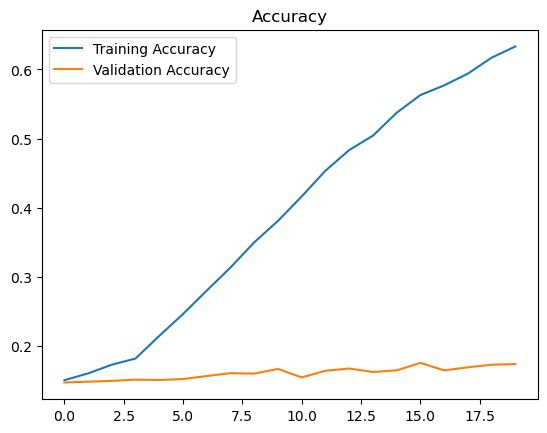

In [6]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

## Training and validation loss

Just like the previous bit of code, this will print out the Training and Validation loss.

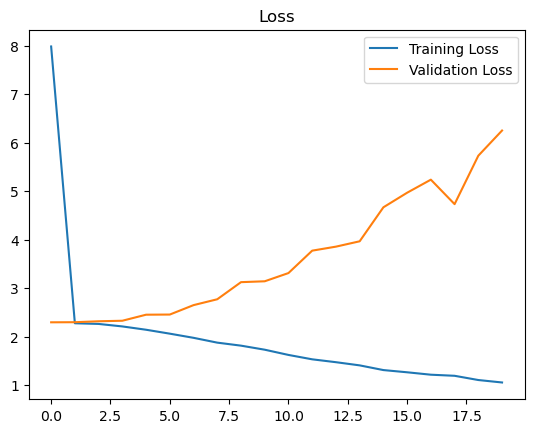

In [7]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

## Classification report

In this part we display the classification report. A classification report is used to summarize the performance of a classification model in terms of several evaluation metrics. It provides a quick way to assess the quality of the model's predictions for each class and the overall performance across all classes.

In [8]:
def display_classification_report(y_true, y_pred, labels):
    report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    display(report_df)

display_classification_report(y_test, y_pred, categories)

,precision,recall,f1-score,support
Bread,0.216216,0.130435,0.162712,368.000000
Dairy product,0.094340,0.033784,0.049751,148.000000
Dessert,0.172911,0.120000,0.141677,500.000000
Egg,0.112727,0.092537,0.101639,335.000000
Fried food,0.237037,0.111498,0.151659,287.000000
Meat,0.281553,0.335648,0.306230,432.000000
Noodles-Pasta,0.040816,0.013605,0.020408,147.000000
Rice,0.037037,0.010417,0.016260,96.000000
Seafood,0.240000,0.217822,0.228374,303.000000
Soup,0.213537,0.530000,0.304423,500.000000


## Confusion matrix

Now we take a look at the confusion matrix, which will helps visualize and understand the performance of a classification model by comparing its predictions with the actual ground truth labels. It provides a summary of the correct and incorrect predictions made by the classifier, broken down by each class. This enables us to quickly identify the areas where the model performs well and where it struggles.

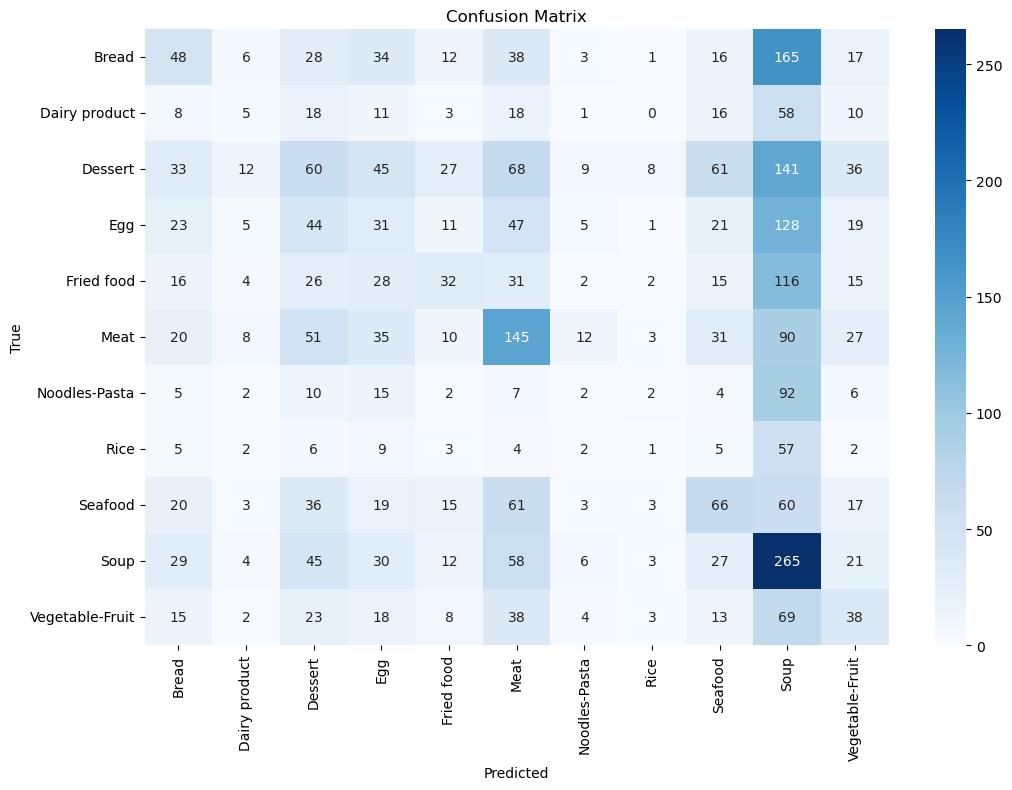

In [9]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix with labels
plot_confusion_matrix(y_test, y_pred, categories)

## Testing The Model On Real Images
Here, we do actual, real world testing with unseen images.

First, we define the function that will that the image and perform the predictions using the model we trained.

This process is relativly fast because the model is already trained at this point.

In [10]:
def predict_food_size(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    prediction = model.predict(np.expand_dims(img, axis=0))
    food_category = categories[np.argmax(prediction)]

    # Estimate the size of the dish
    area = np.sum(img > 50)  # Thresholding to exclude background pixels
    if area < 10000:
        size = 'small'
    elif area < 30000:
        size = 'medium'
    else:
        size = 'large'

    return food_category, size

In [11]:
test_folder_path = '/kaggle/input/food-images-afeka'

file_paths = [os.path.join(test_folder_path, file) for file in os.listdir(test_folder_path) if os.path.isfile(os.path.join(test_folder_path, file))]
i = 1
food_results = {}

for file_path in file_paths:
    test_image_path = file_path
    food_category, size = predict_food_size(test_image_path)
    
    print(f"Item #{i}: {os.path.basename(file_path)}")
    print(f"Food Category: {food_category}")
    print(f"Estimated Size: {size}")
    i += 1
    food_results[food_category] = size
    print()

1/1 [==============================] - 0s 35ms/step
Item #1: meat.jpg
Food Category: Dessert
Estimated Size: large

1/1 [==============================] - 0s 36ms/step
Item #2: egg.jpg
Food Category: Bread
Estimated Size: medium

1/1 [==============================] - 0s 33ms/step
Item #3: soup.jpg
Food Category: Soup
Estimated Size: large

1/1 [==============================] - 0s 34ms/step
Item #4: seafood.jpg
Food Category: Dessert
Estimated Size: medium



# Part 2 - Calculating Nutritional Values of Given Dish
The second part where we use a csv-based dataset which contains nutritional values of many food items to build a model, then we will use a costumised function which will take a dish string and find the closest match in the trained model to provide estimation for the calory count.

In [12]:
# Load and preprocess the data
csv_data_path = '/kaggle/input/nutritional-values-for-common-foods-and-products/nutrition.csv'
data = pd.read_csv(csv_data_path)

# Data Cleanup

In this section of the code, we prepared a customized funciton `convert_measurement` which will handle converting grams into recognizeable float-point values that the machine learning algorithm will ve able to use and train upon.

Next, we further prepare the data by removing unneeded rows (ones with empty values).

In [13]:
# Function to convert the measurements to numerical floating point values
def convert_measurement(value):
    try:
        value = str(value)
        value = re.sub(r'\s+', '', value)  # Remove extra spaces
        if 'mcg' in value:
            return float(value.replace("mcg", "")) / 1000000
        elif 'mg' in value:
            return float(value.replace("mg", "")) / 1000
        elif 'g' in value:
            return float(value.replace("g", ""))
        elif 'IU' in value:
            return float(value.replace("IU", "")) * 0.025 / 1000000
        else:
            return float(value)
    except ValueError:
        print(f"Failed to convert: {value}")
        return np.nan

# Convert measurements to numerical values for all columns with measurements
columns_to_convert = data.columns[2:]  # All columns except 'name' and 'serving_size'
for column in columns_to_convert:
    data[column] = data[column].apply(convert_measurement)

# Remove rows containing no value
data = data.dropna()

# Prepare the data for training
X = data.drop(['name', 'calories'], axis=1)
y = data['calories']

## Preparing The Model

Here, we split our dataset into tain and test, then we perform feature selection using StandardScaler library. This is a pre-requisite of the training process, and can help improve the performance of certain machine learning algorithms that are sensitive to the scale of the input features.

The Random state seed we used is 42 becasue this is the seed that we usually use for machine learning projects in Afeka.

In [14]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

## Traning The Model

Now we train the model using Random Forest Regressor. Let's break it down line by line:

`csv_model = RandomForestRegressor(n_estimators=100, random_state=42):` This line initializes a RandomForestRegressor object with two parameters:

`n_estimators=100`: The number of trees in the forest. In this case, 100 trees will be created. The number of trees we choose is dependent on the dataset, and requires to perform cross-validation with different values in order to find the right amount. For this project, we used 100 as a starting point, and it proved show good results.

`random_state=42`: A random seed. Once again we chose 42 because that is the number that we usually use in Machine Learning in Afeka.

`csv_model.fit(X_train_2, y_train_2)`: This line trains the RandomForestRegressor model using the provided training data.

In [15]:
csv_model = RandomForestRegressor(n_estimators=100, random_state=42)
csv_model.fit(X_train_2, y_train_2)

RandomForestRegressor(random_state=42)

## Evaluating The Training Results

Once again, we will try and evaluate our model training results using graphs and other tools.

This is important and will allow us to identify potential week points in the algorithm, and will allow us to fine-tune it to get better results in the future once (and if) anyone would decide to build upon it and use it for different programs.

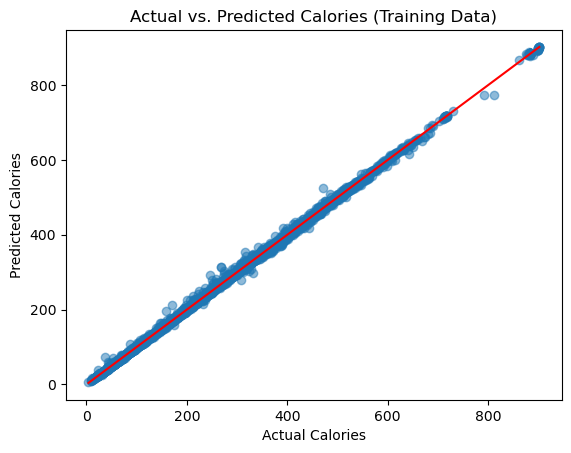

In [16]:
# Predict the calories for the training data
y_train_pred = csv_model.predict(X_train_2)

# Create a scatter plot of the actual vs. predicted calories
plt.scatter(y_train_2, y_train_pred, alpha=0.5)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories (Training Data)")

# Add a diagonal line representing perfect predictions
diagonal_line = np.linspace(min(y_train_2.min(), y_train_pred.min()), max(y_train_2.max(), y_train_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, color='red')

plt.show()

## Feature Importance analysis

Here we can see how our StandardScalar's feature selection did.

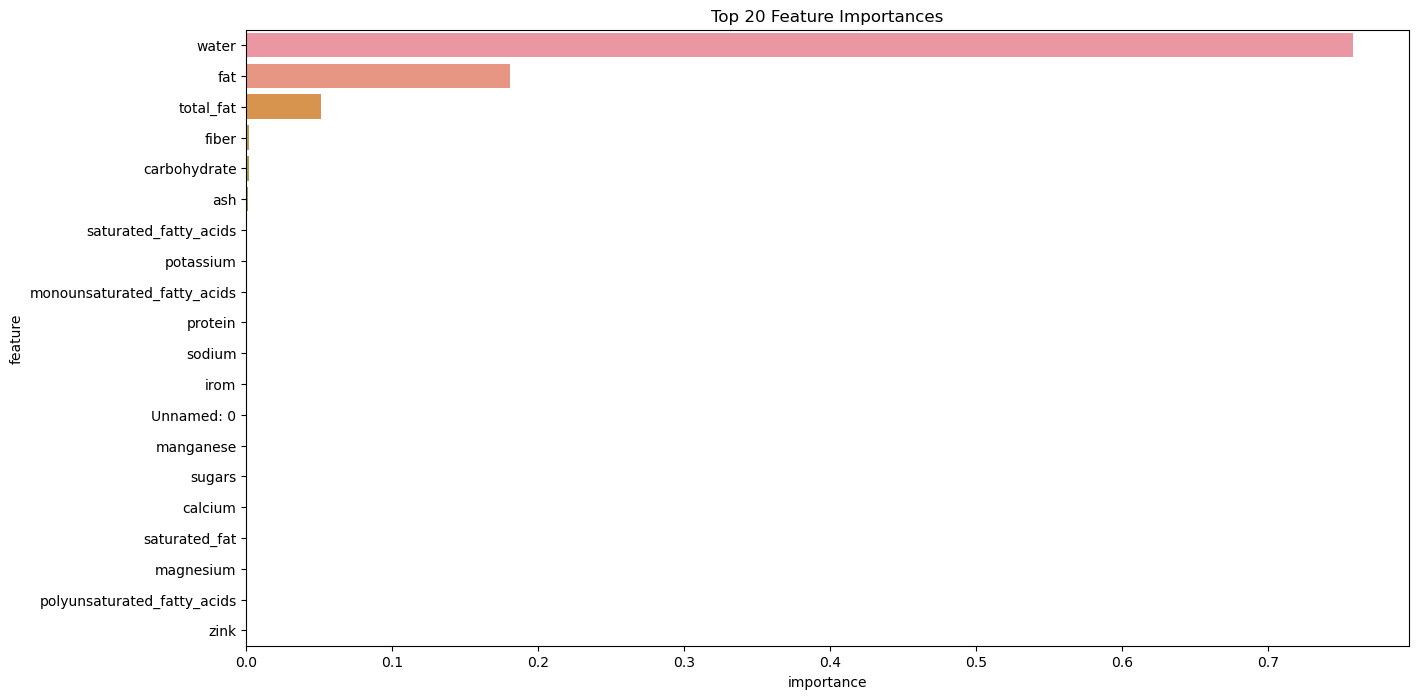

In [17]:
# Analyze feature importance
feature_importances = csv_model.feature_importances_
importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

## Real-World Testing
Here, we will once again test the model on unseen, real-world data.

In [18]:
def closest_match(dish_name):
    highest_ratio = 0
    best_match = None
    for name in data['name']:
        similarity_ratio = difflib.SequenceMatcher(None, dish_name.lower(), name.lower()).ratio()
        if similarity_ratio > highest_ratio:
            highest_ratio = similarity_ratio
            best_match = name
    return best_match

def estimate_nutritional_values(dish_name, size):
    portion_sizes = {'small': 0.5, 'medium': 1, 'large': 1.5}
    portion_multiplier = portion_sizes.get(size.lower(), 1)

    closest_dish_name = closest_match(dish_name)
    if not closest_dish_name:
        return "Dish not found in the dataset."
    
    dish_row = data[data['name'] == closest_dish_name]
    
    dish_features = dish_row.drop(['name', 'calories'], axis=1)
    dish_features_scaled = scaler.transform(dish_features)
    
    estimated_calories = csv_model.predict(dish_features_scaled) * portion_multiplier
    return closest_dish_name, estimated_calories[0]

In [19]:
for dish_name, size in food_results.items():
    res = estimate_nutritional_values(dish_name, size)
    if res != "":
        print("Estimated calories for", size, dish_name, ":", estimate_nutritional_values(dish_name, size))

Estimated calories for medium Dessert : ('Dessert topping, powdered', 570.45)
Estimated calories for medium Bread : ('Bread, rye', 257.94)
Estimated calories for large Soup : ('Soursop, raw', 101.28)
